<a href="https://www.kaggle.com/code/dsptlp/clustering-kmeans-with-pca?scriptVersionId=162437979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LogNorm
import numpy as np 
import pandas as pd

# EXAMPLE 1 - Apple Quality

In [2]:
data_df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv', delimiter=',') 
print(len(data_df))
data_df = data_df.drop('A_id', axis=1)
data_df = data_df[data_df['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']
data_df.head(2)

4001


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [3]:
scalar = StandardScaler()
df_std = scalar.fit_transform(data_df.drop('Quality', axis=1))

In [4]:
# Convert these lists to numpy arrays.
X = np.array(df_std)
Y = np.array(data_df['Quality'])

# Split into train and test data.
train_data, train_labels = X[:], Y[:]

Fraction of the total variance in the training data that is explained by 1 components is = 21.61 %
Fraction of the total variance in the training data that is explained by 2 components is = 42.48 %
Fraction of the total variance in the training data that is explained by 3 components is = 60.42 %
Fraction of the total variance in the training data that is explained by 4 components is = 76.79 %
Fraction of the total variance in the training data that is explained by 5 components is = 86.91 %
Fraction of the total variance in the training data that is explained by 6 components is = 95.62 %
Fraction of the total variance in the training data that is explained by 7 components is = 100.00 %


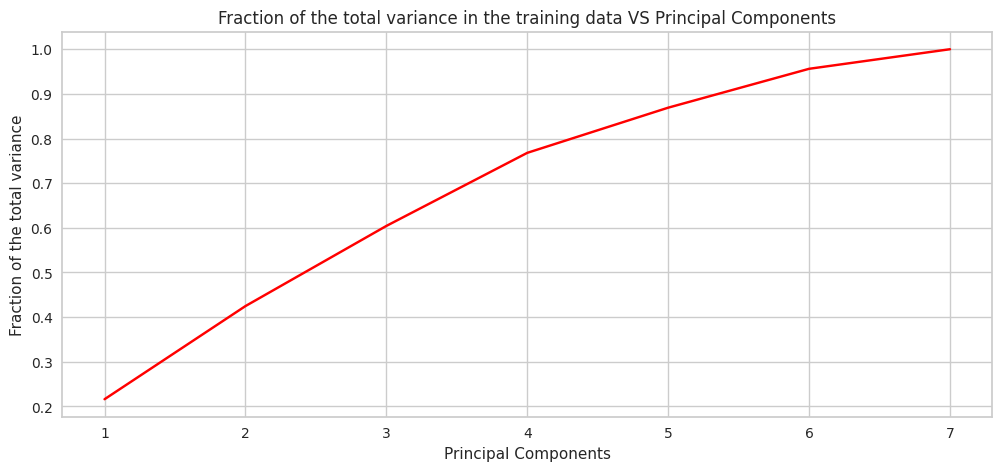

In [5]:
vals = []

# Running for all possible values of k
k = range(1,(len(train_data[1])+1),1)
for comp_int in k:

    # Create PCA Model
    model = PCA(n_components = comp_int)
    model.fit(train_data)
    explained = np.sum(model.explained_variance_ratio_)
    print("Fraction of the total variance in the training data that is explained by %0.0f" %comp_int ,"components is = %0.2f %%" %(explained*100))
    vals.append(explained)

#Graph Results    
fig=plt.figure(figsize=(12,5))
plt.plot(k,vals,color='red')
plt.xlabel("Principal Components")
plt.ylabel("Fraction of the total variance")
plt.title("Fraction of the total variance in the training data VS Principal Components")
plt.show()

Elbow Method to determine the number of clusters to be formed:
Optimal number of clusters: 5


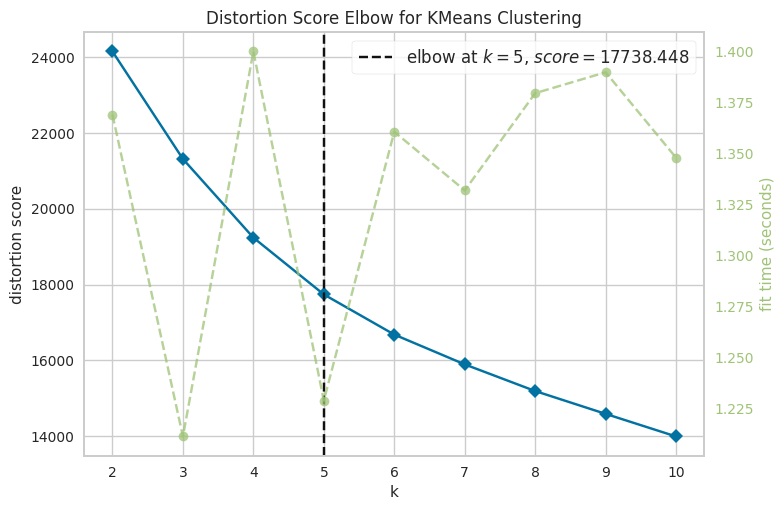

In [6]:
 # Build the PCA Model
model_pca = PCA(n_components = (len(train_data[1])))
train_data_pca = model_pca.fit_transform(train_data)

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(train_data_pca)
Elbow_M.show(outpath="elbow_plot.png")

optimal_k = Elbow_M.elbow_value_
print("Optimal number of clusters:", optimal_k)

In [7]:
# Build the KMeans Model
model_kmeans = KMeans(n_clusters=optimal_k,init = 'k-means++',n_init='auto')
kmeans_clusters = model_kmeans.fit(train_data)
kmeans_clusters

data_df['kmean_clusters'] = kmeans_clusters.labels_
data_df.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,kmean_clusters
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good,1


In [8]:
 # Build the PCA Model 2 DIMS
model_pca = PCA(n_components = 2)
train_data_pca = model_pca.fit_transform(train_data)
train_data_pca = pd.DataFrame(train_data_pca)
train_data_pca.columns = ['pca_x','pca_y']
train_data_pca.head(2)

,pca_x,pca_y
0,0.564498,3.436017
1,0.407303,1.023805


In [9]:
ff = pd.merge(data_df, train_data_pca, left_index=True, right_index=True)
ff

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,kmean_clusters,pca_x,pca_y
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good,1,0.564498,3.436017
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,1,0.407303,1.023805
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,4,0.913965,0.361024
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,4,2.177365,1.212996
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,4,1.168315,0.328066
...,...,...,...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad,0,-0.916506,-0.535996
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good,3,0.869778,0.525210
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad,0,-2.082775,0.747550
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good,3,-0.218512,2.593260


# EXAMPLE 2 - Mushrooms

In [10]:
data_df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv', delimiter=',') 
print(len(data_df))
data_df.head(5)

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
data_df.loc[data_df["class"] == "p", "class"] = 1
data_df.loc[data_df["class"] == "e", "class"] = 0
data_df['class'] = data_df['class'].astype(int)
data_df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [12]:
# Perform one-hot encoding using get_dummies
df_encoded = pd.get_dummies(data_df)
df_encoded.head(2)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [13]:
print(df_encoded.columns)

Index(['class', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=118)


In [14]:
# Convert these lists to numpy arrays.
X = np.array(df_encoded.drop('class', axis=1))
Y = np.array(df_encoded['class'])

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

Fraction of the total variance in the training data that is explained by 1 components is = 17.76 %
Fraction of the total variance in the training data that is explained by 2 components is = 31.26 %
Fraction of the total variance in the training data that is explained by 3 components is = 41.28 %
Fraction of the total variance in the training data that is explained by 4 components is = 48.60 %
Fraction of the total variance in the training data that is explained by 5 components is = 52.81 %
Fraction of the total variance in the training data that is explained by 6 components is = 56.39 %
Fraction of the total variance in the training data that is explained by 7 components is = 59.41 %
Fraction of the total variance in the training data that is explained by 8 components is = 62.20 %
Fraction of the total variance in the training data that is explained by 9 components is = 64.64 %
Fraction of the total variance in the training data that is explained by 10 components is = 66.92 %
Fraction 

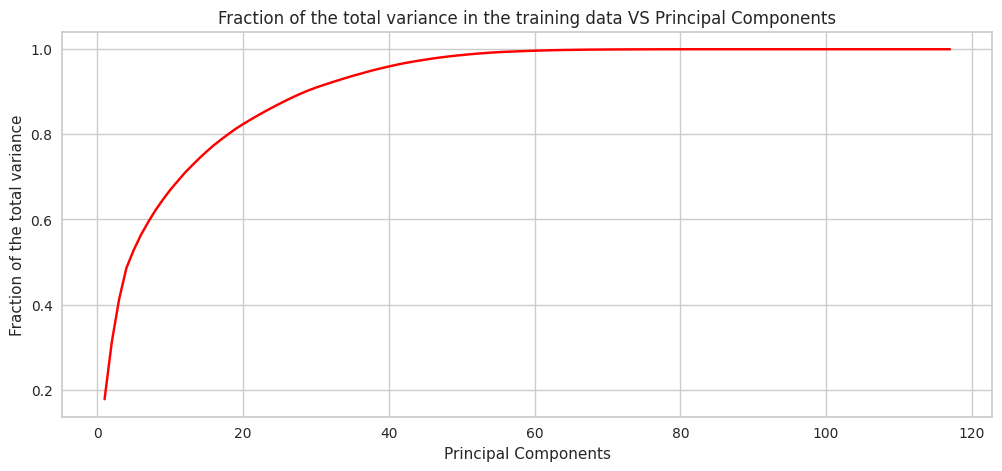

In [15]:
vals = []

# Running for all possible values of k
k = range(1,(len(train_data[1])+1),1)
for comp_int in k:

    # Create PCA Model
    model = PCA(n_components = comp_int)
    model.fit(train_data)
    explained = np.sum(model.explained_variance_ratio_)
    print("Fraction of the total variance in the training data that is explained by %0.0f" %comp_int ,"components is = %0.2f %%" %(explained*100))
    vals.append(explained)

#Graph Results    
fig=plt.figure(figsize=(12,5))
plt.plot(k,vals,color='red')
plt.xlabel("Principal Components")
plt.ylabel("Fraction of the total variance")
plt.title("Fraction of the total variance in the training data VS Principal Components")
plt.show()

In [16]:
 # Build the PCA Model
model_pca = PCA(n_components = 8)
train_data_2dims = model_pca.fit_transform(train_data)

In [17]:
scores_pca = model_pca.transform(train_data)
scores_pcs_df = pd.DataFrame(scores_pca)
scores_pcs_df

,0,1,2,3,4,5,6,7
0,-1.238097,0.564307,0.928913,-1.427228,-0.636236,-0.572160,-0.487799,-0.125880
1,-1.117601,-0.318289,1.326009,-1.561041,-0.374946,0.076553,0.485473,0.201254
2,-1.354278,-0.274049,1.083638,-1.716104,0.213969,-0.296566,0.252866,0.396688
3,-1.224433,0.228225,0.836595,-1.634270,-0.558392,-0.181433,-0.748982,-0.767091
4,-0.890013,1.123707,1.645432,1.332420,-0.594780,0.497549,0.288364,0.077729
...,...,...,...,...,...,...,...,...
6995,0.850158,1.985998,-1.514161,-0.066242,0.569055,-0.079797,-0.204007,-0.358661
6996,0.820396,2.022782,-1.443264,-0.286948,0.017136,0.305010,-0.202607,-0.296540
6997,-0.108080,0.567043,1.540138,0.086987,0.149292,0.415276,-0.660351,1.243772
6998,-0.157830,0.692708,1.536430,-0.241200,-0.315594,0.711783,0.170414,1.189278


Elbow Method to determine the number of clusters to be formed:


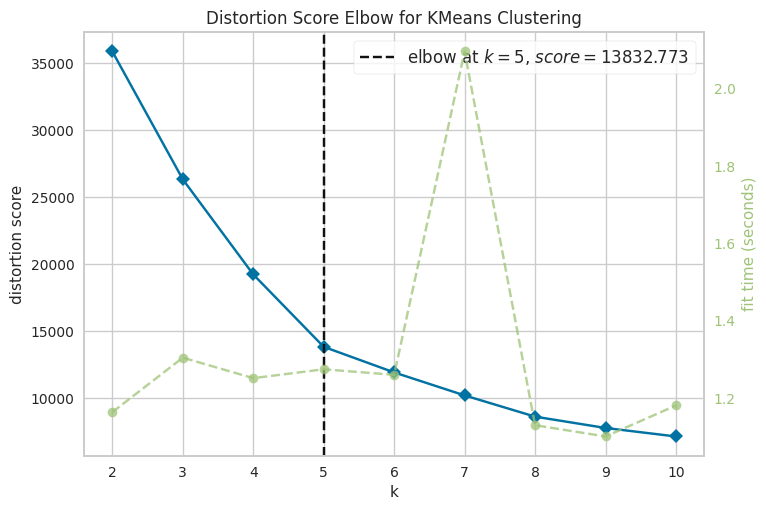

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(train_data_2dims)
Elbow_M.show()

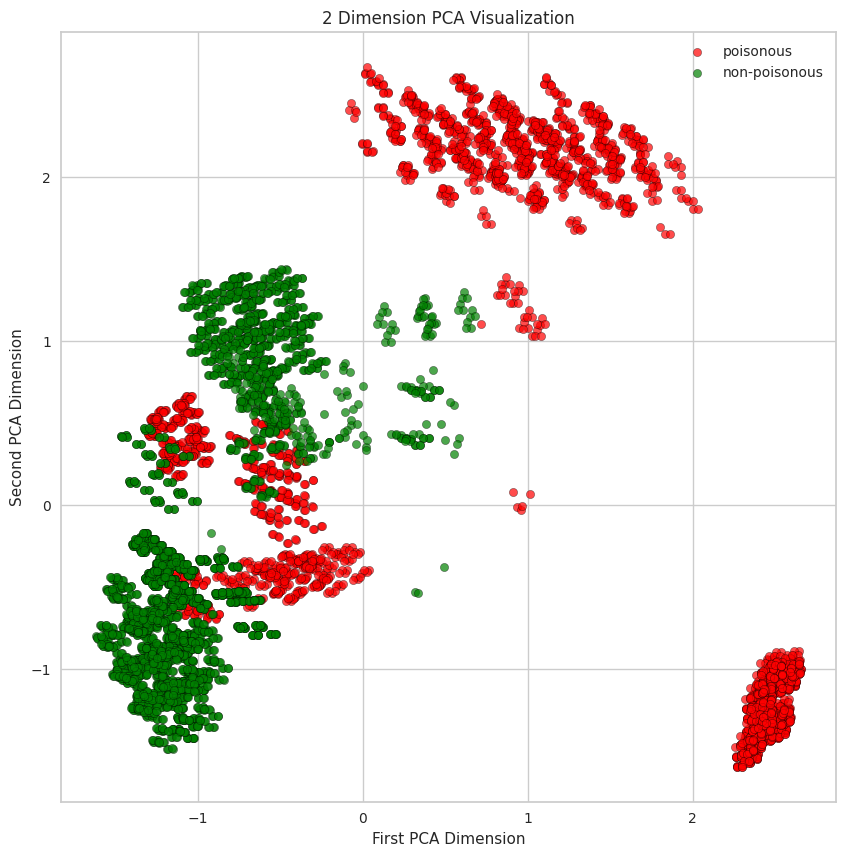

In [19]:
# Build PCA Model with 2 PCA Components
model = PCA(n_components = 2)
train_data_2dims = model.fit_transform(train_data)

# Graph Results
fig=plt.figure(figsize=(10,10))
plt.scatter(train_data_2dims[:,0][train_labels==1],train_data_2dims[:,1][train_labels==1],marker="o",color='red', label="poisonous",edgecolor='black',s=35,alpha=0.7)
plt.scatter(train_data_2dims[:,0][train_labels==0],train_data_2dims[:,1][train_labels==0],marker="o",color='green', label="non-poisonous",edgecolor='black',s=35,alpha=0.7)    
plt.xlabel("First PCA Dimension")
plt.ylabel("Second PCA Dimension")
plt.legend()
plt.title("2 Dimension PCA Visualization")
plt.show()

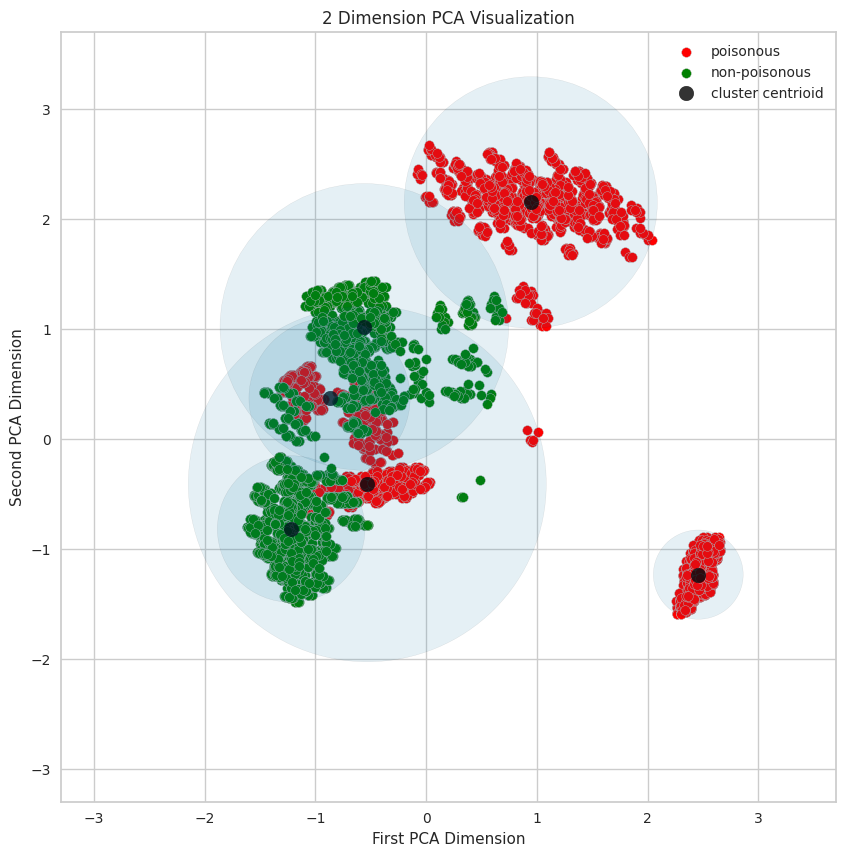

In [20]:
# Build the PCA Model
model_pca = PCA(n_components = 2)
train_data_2dims = model_pca.fit_transform(train_data)

# Build the KMeans Model
model_kmeans = KMeans(n_init=10,n_clusters=6)
kmeans_clusters = model_kmeans.fit(train_data_2dims)

# Create The Graph
fig=plt.figure(figsize=(10,10))
plt.xlim([-3.3,3.7])
plt.ylim([-3.3,3.7])
plt.scatter(train_data_2dims[:,0][train_labels==1],train_data_2dims[:,1][train_labels==1],marker="o",color='red', edgecolor='silver',label="poisonous")
plt.scatter(train_data_2dims[:,0][train_labels==0],train_data_2dims[:,1][train_labels==0],marker="o",color='green', edgecolor='silver',label="non-poisonous")
plt.scatter(kmeans_clusters.cluster_centers_[:,0],kmeans_clusters.cluster_centers_[:,1],marker="o",color='black', label="cluster centrioid",s=110,alpha=0.8)

#Get All Cluster Centers
for idx,centerxy in enumerate(kmeans_clusters.cluster_centers_):

    #Set Radious to zero
    circle_radius = 0

    # Determine the distance between the center and find the largest radius
    for xy_point in train_data_2dims[kmeans_clusters.labels_ == idx]:
        new_circle_rad = np.linalg.norm(centerxy-xy_point)

        #if new radius is bigger set it as the one we want
        if new_circle_rad > circle_radius:
            circle_radius = new_circle_rad

    # Draw the circle
    circle = plt.Circle(centerxy,circle_radius,alpha=0.1,edgecolor='black')        
    plt.gca().add_artist(circle)    

plt.xlabel("First PCA Dimension")
plt.ylabel("Second PCA Dimension")
plt.legend()
plt.title("2 Dimension PCA Visualization")
plt.show()

/tmp/ipykernel_17/1593048683.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,4,1+(4*idx2+idx))


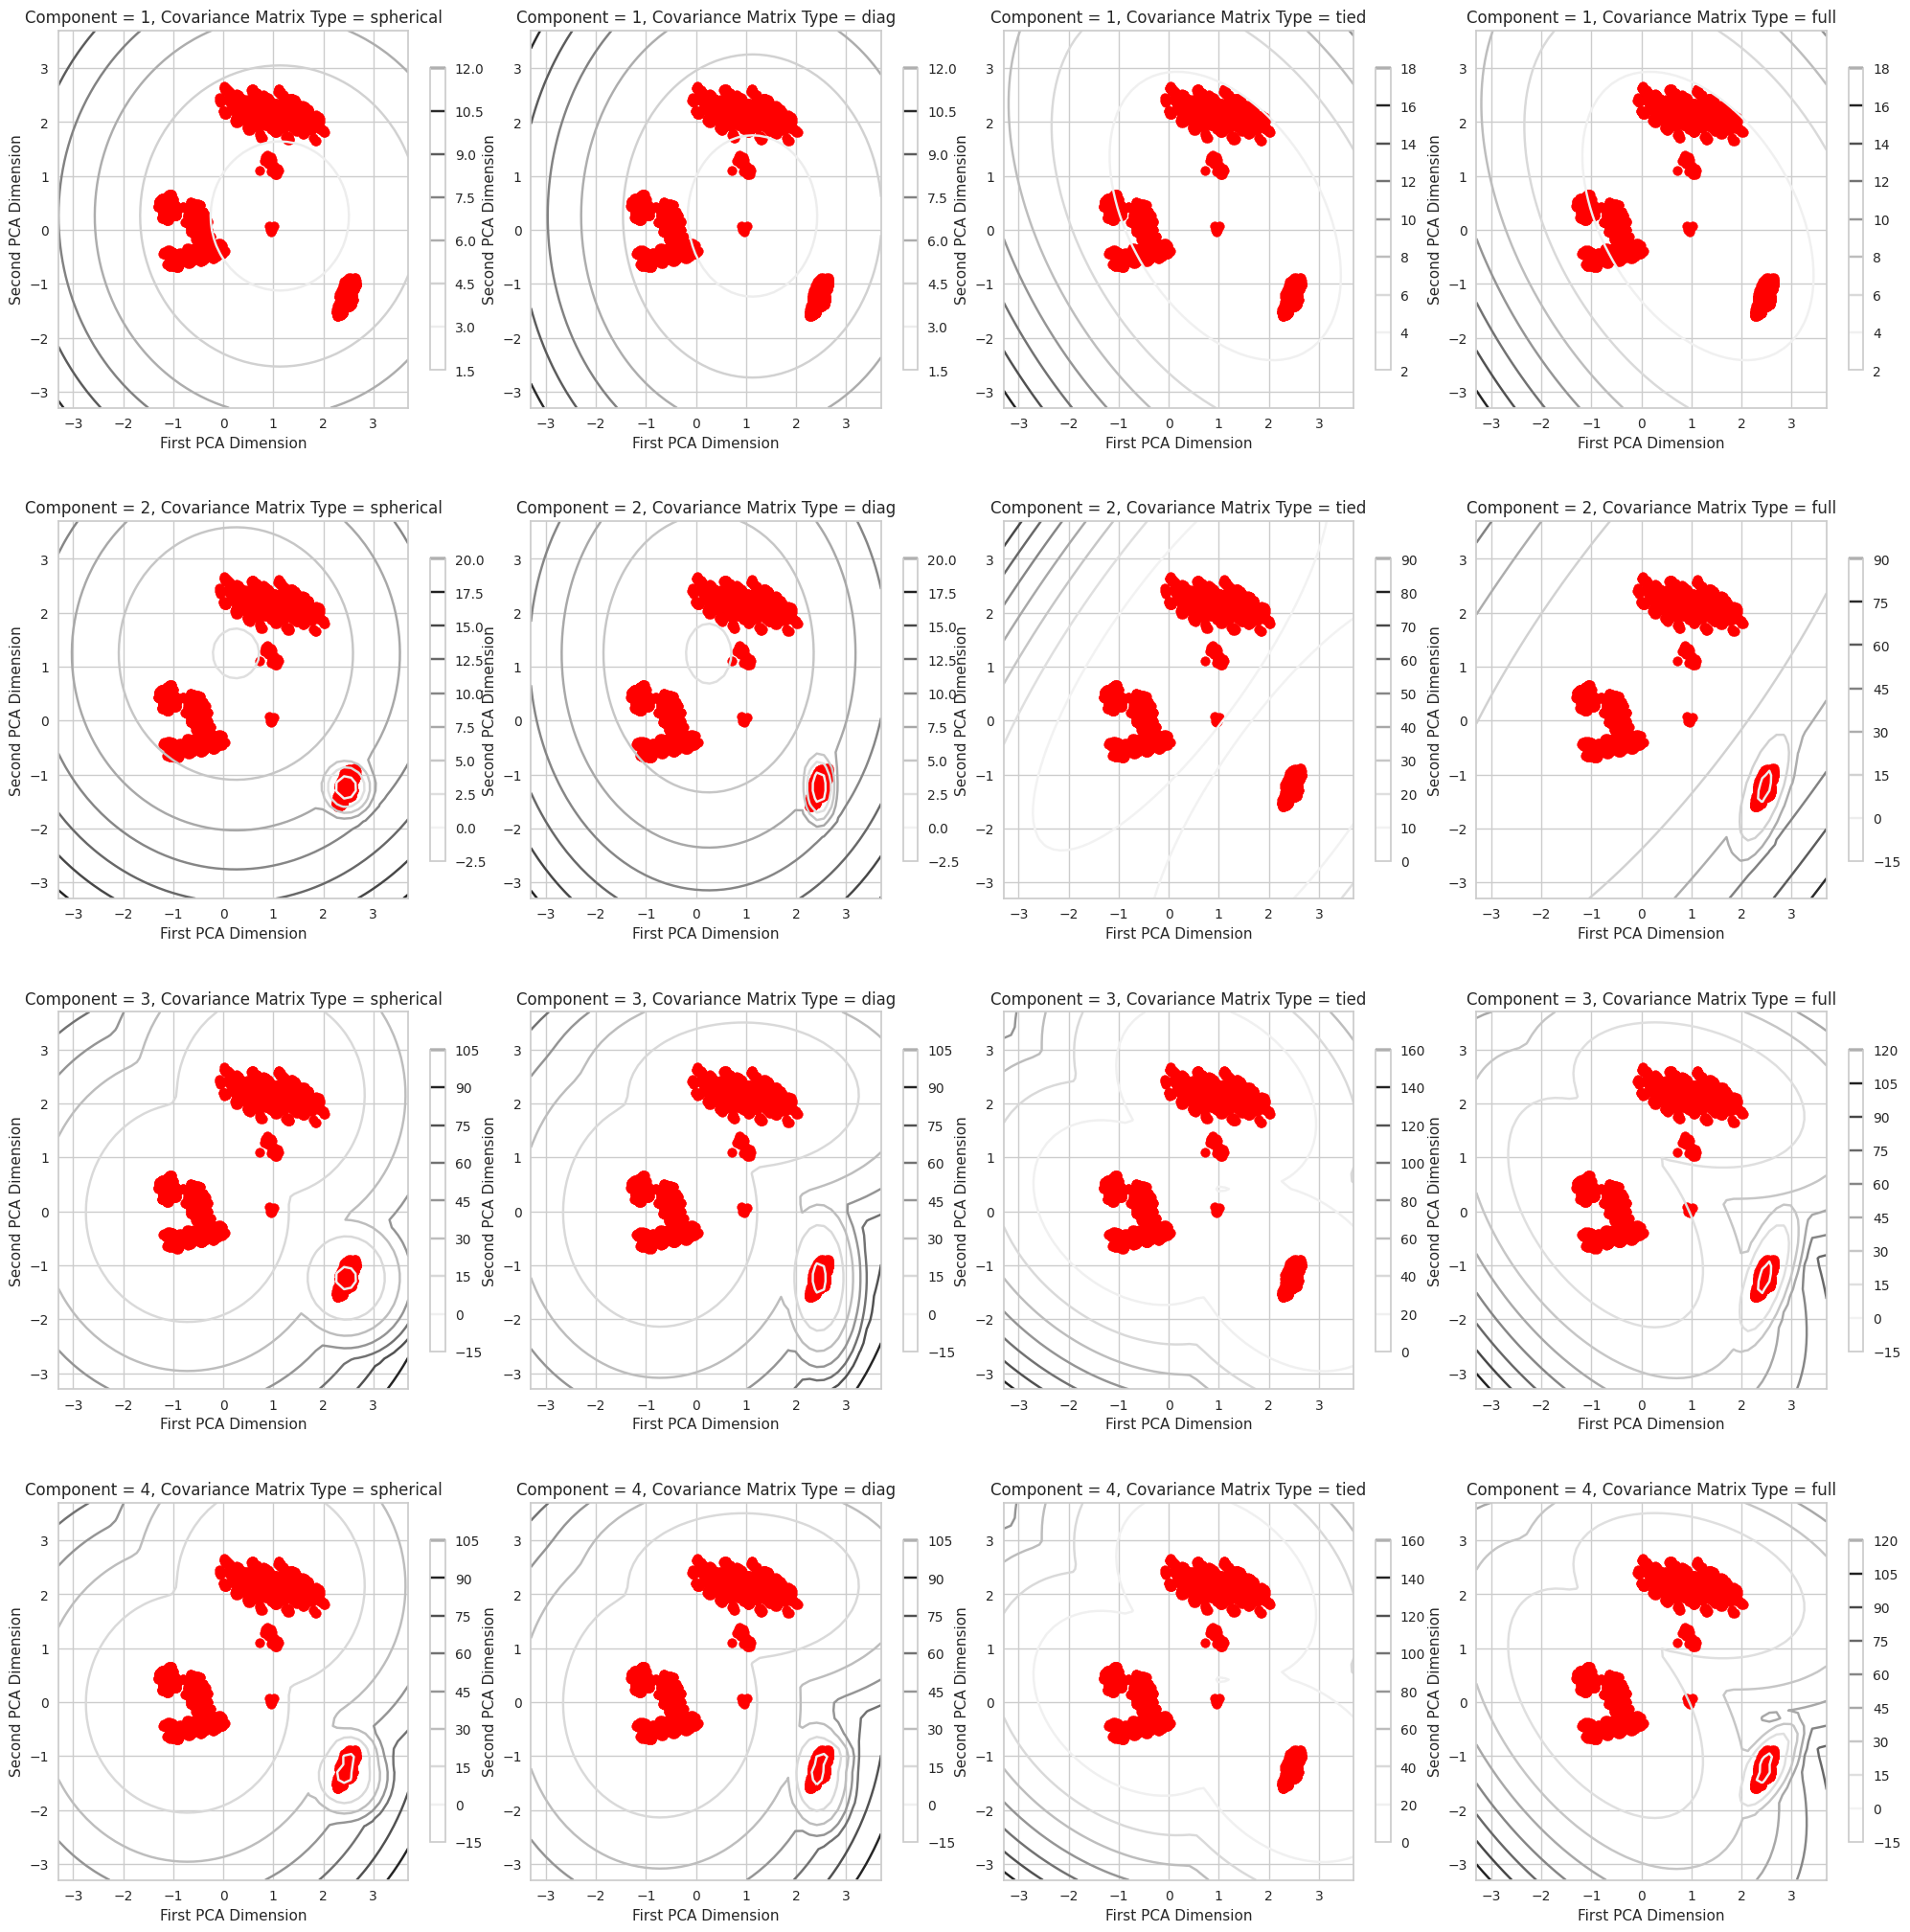

In [21]:
# Declare the required variable combinations
cov_matrix_type_list = ['spherical', 'diag', 'tied', 'full']
components_list = [1,2,3,4]

# Build PCA Model
model_pca = PCA(n_components = 2)
train_data_2dims = model_pca.fit_transform(train_data)

# Only for Positive Cases
pos_ex = train_data_2dims[train_labels==1]

# Declare fig subplot
fig, ax = plt.subplots(figsize=(25,65) , sharex=True,sharey=True)

# Loop for the required combinations
for idx, cov_matrix_type in enumerate(cov_matrix_type_list):
    for idx2, components in enumerate(components_list):

        #Create GMM Model
        model_GMM = GaussianMixture(n_components=components,covariance_type=cov_matrix_type,random_state=12345)
        model_GMM.fit(pos_ex)

        #Make the contour 
        plt.subplot(10,4,1+(4*idx2+idx)) 

        # This portion of code is from the provided example https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py  
        x = np.linspace(-3.3,3.7)
        y = np.linspace(-3.3,3.7)            
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -model_GMM.score_samples(XX)
        Z = Z.reshape(X.shape)            
        CS = plt.contour(X, Y, Z)            
        CB = plt.colorbar(CS, shrink=0.8)

        #Plot the graph
        plt.scatter(train_data_2dims[:,0][train_labels==1],train_data_2dims[:,1][train_labels==1],marker="o",color='red')
        plt.xlabel("First PCA Dimension")
        plt.ylabel("Second PCA Dimension")
        plt.title("Component = %0.0f" % components  + ", Covariance Matrix Type = " + str(cov_matrix_type))
        plt.subplots_adjust(hspace=0.3,wspace=0.08)

# Save the entire subplot to an image file
plt.savefig("cov_plot.png")        
        
#show the entire subplot
plt.show()

In [22]:
# Build PCA Model
model_pca = PCA(n_components = 2)
train_data_2dims = model_pca.fit_transform(train_data)
test_data_2dims = model_pca.transform(test_data)

# Split data into pos and neg
pos_ex = train_data_2dims[train_labels==1]
neg_ex = train_data_2dims[train_labels==0]

#Create GMM Model for positive
model_GMM_pos = GaussianMixture(n_components=4,covariance_type='full',random_state=12345)
model_GMM_pos.fit(pos_ex)

#Create GMM Model for negative
model_GMM_neg = GaussianMixture(n_components=4,covariance_type='full',random_state=12345)
model_GMM_neg.fit(neg_ex)

#accuracy calculation
higher_prob_label_case = (model_GMM_pos.score_samples(test_data_2dims) > model_GMM_neg.score_samples(test_data_2dims)).astype(int)
correct_predictions = np.where(higher_prob_label_case == np.array(test_labels),1,0)

print("The accuracy of the predictions on the test data is = %0.02f %%" % ((correct_predictions.sum()/test_labels.size)*100))

The accuracy of the predictions on the test data is = 89.06 %


In [23]:
cov_matrix_type_list = ['spherical', 'diag', 'tied', 'full']
pca_components_list = range(1,100,1)
gmm_components_list = range(1,100,1)
result = []
highest_accuracy = 0

print("Running experiments:")

# For all the possible combinations of pca/gmm and cov_matrix_type
for cov in cov_matrix_type_list:
    for pca in pca_components_list:
        for gmm in gmm_components_list:

            # Based on the provided parameter count definition
            if cov == 'tied':
                param_count = 2 * ((pca * gmm) + (pca*(pca+1)/2 ))
            elif cov == 'spherical':
                param_count = 2 * (gmm * pca + gmm)
            elif cov == 'diag':
                param_count = 4 * gmm * pca
            elif cov == 'full':
                param_count = 2 * ((pca * gmm) + (pca*(pca+1)/2 * gmm ))

            # Only calculate if the parameter count is <= 50
            if param_count <= 50:

                # Build the PCA Model
                model_pca = PCA(n_components = pca)
                train_data_trans = model_pca.fit_transform(train_data)
                test_data_trans = model_pca.transform(test_data)

                # Create positive and negative cases
                pos_ex = train_data_trans[train_labels==1]
                neg_ex = train_data_trans[train_labels==0]

                # Build the GMM model for positive 
                model_GMM_pos = GaussianMixture(n_components=gmm, covariance_type=cov, random_state=12345) 
                model_GMM_pos.fit(pos_ex)

                # Build the GMM model for negative
                model_GMM_neg = GaussianMixture(n_components=gmm, covariance_type=cov, random_state=12345) 
                model_GMM_neg.fit(neg_ex)

                #accuracy calculation, taking the better of pos/neg
                higher_prob_label_case = (model_GMM_pos.score_samples(test_data_trans) > model_GMM_neg.score_samples(test_data_trans)).astype(int)
                correct_predictions = np.where(higher_prob_label_case == np.array(test_labels),1,0)
                accuracy = ((correct_predictions.sum()/test_labels.size)*100)

                # Records the highest accuracy configuration
                if accuracy > highest_accuracy:
                    result.append({'cov':cov,'pca':pca,'gmm':gmm,'param_count':param_count,'accuracy':accuracy})
                    highest_accuracy = accuracy
                print("Covariance = " + cov + " | PCA Components = %0.f" % pca + " | GMM Components = %0.f " % gmm + " | Parameters Count = %0.0f" % param_count + " | Accuracy = %0.2f %%" %accuracy)

print ("=====================================================================================================================")
print("Gaussian mixture model that results in the best accuracy with no more than 50 parameters is:")    
cov = result[(len(result)-1)]['cov']
pca = result[(len(result)-1)]['pca']
gmm = result[(len(result)-1)]['gmm']
param_count = result[(len(result)-1)]['param_count']
accuracy = result[(len(result)-1)]['accuracy']
print("Covariance = " + cov + " | PCA Components = %0.f" % pca + " | GMM Components = %0.f " % gmm + " | Parameters Count = %0.0f" % param_count + " | Accuracy = %0.2f %%" %accuracy)

Running experiments:
Covariance = spherical | PCA Components = 1 | GMM Components = 1  | Parameters Count = 4 | Accuracy = 72.86 %
Covariance = spherical | PCA Components = 1 | GMM Components = 2  | Parameters Count = 8 | Accuracy = 75.98 %
Covariance = spherical | PCA Components = 1 | GMM Components = 3  | Parameters Count = 12 | Accuracy = 68.77 %
Covariance = spherical | PCA Components = 1 | GMM Components = 4  | Parameters Count = 16 | Accuracy = 68.77 %
Covariance = spherical | PCA Components = 1 | GMM Components = 5  | Parameters Count = 20 | Accuracy = 67.62 %
Covariance = spherical | PCA Components = 1 | GMM Components = 6  | Parameters Count = 24 | Accuracy = 67.62 %
Covariance = spherical | PCA Components = 1 | GMM Components = 7  | Parameters Count = 28 | Accuracy = 67.26 %
Covariance = spherical | PCA Components = 1 | GMM Components = 8  | Parameters Count = 32 | Accuracy = 66.81 %
Covariance = spherical | PCA Components = 1 | GMM Components = 9  | Parameters Count = 36 | A